In [1]:
!pip install -q roboflow
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/12

In [2]:
import os
import cv2
import numpy as np
from ultralytics import YOLO
from roboflow import Roboflow

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
rf = Roboflow(api_key="D1hJiPDZSmvqs862rX57")
project = rf.workspace("sajjad-aemmi").project("persian-license-plate-detection")
dataset = project.version(7).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Persian-License-Plate-Detection-7 in yolov8:: 100%|██████████| 1952/1952 [00:00<00:00, 7141.33it/s]


In [6]:
model = YOLO("yolov8n.yaml")
model.train(data="/content/Persian-License-Plate-Detection-7/data.yaml", epochs=50, imgsz=640)
model.export(format="onnx")


Ultralytics 8.3.118 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/Persian-License-Plate-Detection-7/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

100%|██████████| 755k/755k [00:00<00:00, 22.0MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

YOLOv8n summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 108MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1535.7±656.8 MB/s, size: 57.7 KB)


train: Scanning /content/Persian-License-Plate-Detection-7/train/labels... 726 images, 21 backgrounds, 0 corrupt: 100%|██████████| 726/726 [00:00<00:00, 2437.37it/s]


train: New cache created: /content/Persian-License-Plate-Detection-7/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 180, len(boxes) = 1676. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 623.3±384.0 MB/s, size: 50.4 KB)


val: Scanning /content/Persian-License-Plate-Detection-7/valid/labels... 181 images, 5 backgrounds, 0 corrupt: 100%|██████████| 181/181 [00:00<00:00, 1438.44it/s]

val: New cache created: /content/Persian-License-Plate-Detection-7/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 25, len(boxes) = 415. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.07G        4.8      10.57      4.224         15        640: 100%|██████████| 46/46 [00:15<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.53it/s]

                   all        181        415   5.52e-05    0.00723   4.69e-05   2.03e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.56G      4.411       6.45      3.392         16        640: 100%|██████████| 46/46 [00:12<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.53it/s]

                   all        181        415   0.000124    0.00723   8.08e-05   3.82e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.57G      3.892      4.713      2.811         15        640: 100%|██████████| 46/46 [00:12<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.67it/s]


                   all        181        415    0.00864    0.00241   0.000756   0.000186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.59G      3.549      4.078      2.549          9        640: 100%|██████████| 46/46 [00:11<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.50it/s]


                   all        181        415     0.0291     0.0602    0.00544   0.000938

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.61G      3.405      3.683      2.471         20        640: 100%|██████████| 46/46 [00:14<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.66it/s]

                   all        181        415     0.0316     0.0506    0.00757    0.00162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.62G       3.19      3.277        2.3         30        640: 100%|██████████| 46/46 [00:15<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.62it/s]


                   all        181        415     0.0423      0.041    0.00971    0.00231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.64G      3.073      3.123      2.242         15        640: 100%|██████████| 46/46 [00:11<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.83it/s]


                   all        181        415       0.25      0.178      0.111     0.0329

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.66G      2.869      2.692      2.061         15        640: 100%|██████████| 46/46 [00:12<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.05it/s]

                   all        181        415      0.291      0.173      0.122     0.0389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.68G       2.81      2.453      2.015         17        640: 100%|██████████| 46/46 [00:12<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.04it/s]


                   all        181        415      0.362      0.294      0.235     0.0743

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.69G      2.687      2.276      1.855         22        640: 100%|██████████| 46/46 [00:12<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.98it/s]

                   all        181        415      0.411      0.333      0.268     0.0996



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.71G      2.598      2.181      1.844         15        640: 100%|██████████| 46/46 [00:11<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.57it/s]

                   all        181        415      0.461      0.357      0.313      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.73G      2.522      2.108      1.842         20        640: 100%|██████████| 46/46 [00:11<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.79it/s]

                   all        181        415      0.523      0.347      0.333      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.74G      2.417       1.93      1.676         17        640: 100%|██████████| 46/46 [00:12<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.15it/s]

                   all        181        415      0.494      0.369       0.31      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.76G      2.369      1.927      1.682         20        640: 100%|██████████| 46/46 [00:11<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.03it/s]


                   all        181        415      0.545      0.395      0.373      0.135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.78G      2.347      1.853       1.68         34        640: 100%|██████████| 46/46 [00:12<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.54it/s]

                   all        181        415      0.478      0.427      0.365      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.79G      2.272      1.824      1.633         17        640: 100%|██████████| 46/46 [00:11<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.41it/s]

                   all        181        415      0.542       0.46      0.415      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.81G      2.243      1.784      1.578         22        640: 100%|██████████| 46/46 [00:12<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.46it/s]


                   all        181        415      0.574      0.442      0.417      0.172

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.83G      2.256      1.816      1.594          6        640: 100%|██████████| 46/46 [00:12<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.68it/s]

                   all        181        415       0.61      0.395      0.411      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.85G      2.185      1.726      1.548         12        640: 100%|██████████| 46/46 [00:12<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.87it/s]

                   all        181        415      0.567      0.465      0.433      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.87G      2.203      1.747      1.555          9        640: 100%|██████████| 46/46 [00:12<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.40it/s]

                   all        181        415      0.639      0.439      0.456       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.88G      2.097      1.615      1.523         24        640: 100%|██████████| 46/46 [00:11<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.84it/s]

                   all        181        415      0.696      0.519      0.526      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       2.9G      2.102      1.622       1.54         15        640: 100%|██████████| 46/46 [00:11<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.71it/s]

                   all        181        415      0.694      0.487      0.495      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.91G      2.081      1.539      1.496         27        640: 100%|██████████| 46/46 [00:11<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.89it/s]

                   all        181        415      0.699      0.518      0.535      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.93G      2.083      1.611      1.532         15        640: 100%|██████████| 46/46 [00:11<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.94it/s]


                   all        181        415      0.706      0.477      0.484      0.199

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.95G      2.063      1.572      1.504         13        640: 100%|██████████| 46/46 [00:11<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.60it/s]

                   all        181        415      0.738      0.492      0.525      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.96G       2.03      1.627      1.442         28        640: 100%|██████████| 46/46 [00:11<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.67it/s]

                   all        181        415       0.69      0.504      0.532      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.99G      2.006      1.599        1.5         19        640: 100%|██████████| 46/46 [00:11<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.49it/s]


                   all        181        415      0.701      0.482      0.496      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         3G      2.046        1.6      1.494         16        640: 100%|██████████| 46/46 [00:12<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.36it/s]

                   all        181        415       0.57      0.511      0.475      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.02G      2.001      1.571      1.457         13        640: 100%|██████████| 46/46 [00:11<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.70it/s]

                   all        181        415       0.72       0.54      0.562      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.03G      1.961      1.492      1.438         29        640: 100%|██████████| 46/46 [00:11<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.78it/s]

                   all        181        415      0.763       0.53      0.572      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.05G      1.986       1.49      1.441         20        640: 100%|██████████| 46/46 [00:11<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.88it/s]

                   all        181        415      0.786      0.492      0.553      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.07G      1.989       1.49       1.44          7        640: 100%|██████████| 46/46 [00:12<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.63it/s]

                   all        181        415      0.682      0.526      0.511      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.08G      1.957      1.466      1.404         22        640: 100%|██████████| 46/46 [00:11<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.93it/s]

                   all        181        415      0.704      0.533      0.558       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.11G      1.914      1.461      1.428         14        640: 100%|██████████| 46/46 [00:11<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.74it/s]

                   all        181        415      0.751      0.552      0.575      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.12G      1.932      1.434      1.392         14        640: 100%|██████████| 46/46 [00:11<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.73it/s]


                   all        181        415      0.728      0.581      0.586      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.14G       1.91      1.441      1.398         11        640: 100%|██████████| 46/46 [00:11<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.67it/s]


                   all        181        415      0.778       0.53      0.593      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.16G      1.916      1.476      1.428         10        640: 100%|██████████| 46/46 [00:11<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.54it/s]


                   all        181        415      0.766      0.559      0.599      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.17G      1.951       1.43      1.392         13        640: 100%|██████████| 46/46 [00:11<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.27it/s]

                   all        181        415      0.762       0.52      0.571      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.19G      1.945      1.417      1.413         25        640: 100%|██████████| 46/46 [00:11<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.49it/s]

                   all        181        415      0.769      0.545      0.596       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.21G      1.867      1.403      1.346         19        640: 100%|██████████| 46/46 [00:11<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.68it/s]

                   all        181        415       0.74      0.562      0.589      0.275


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.22G      1.812      1.308      1.362         16        640: 100%|██████████| 46/46 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.91it/s]

                   all        181        415       0.76      0.542       0.59      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.24G      1.771      1.283      1.353         19        640: 100%|██████████| 46/46 [00:13<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.68it/s]

                   all        181        415      0.777      0.559      0.607      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.26G      1.745       1.25      1.335         11        640: 100%|██████████| 46/46 [00:12<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.70it/s]


                   all        181        415      0.816      0.554      0.619      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.27G       1.76      1.249       1.35          5        640: 100%|██████████| 46/46 [00:12<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.31it/s]

                   all        181        415      0.774      0.593       0.62      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.29G      1.775      1.241      1.358         20        640: 100%|██████████| 46/46 [00:12<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.95it/s]

                   all        181        415      0.786      0.569      0.616      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.31G       1.73      1.233       1.34         13        640: 100%|██████████| 46/46 [00:11<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.48it/s]

                   all        181        415      0.795       0.58      0.623      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.33G      1.693       1.22      1.313         14        640: 100%|██████████| 46/46 [00:10<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.78it/s]

                   all        181        415      0.758      0.581      0.615      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.34G      1.674      1.174      1.297         10        640: 100%|██████████| 46/46 [00:10<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.91it/s]

                   all        181        415      0.788      0.605      0.632      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.36G      1.661      1.163      1.282         22        640: 100%|██████████| 46/46 [00:11<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.94it/s]

                   all        181        415      0.765        0.6      0.634      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.38G      1.686       1.17      1.315         21        640: 100%|██████████| 46/46 [00:11<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.65it/s]

                   all        181        415       0.77      0.607       0.64      0.317



50 epochs completed in 0.199 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.118 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.75it/s]


                   all        181        415      0.767      0.607       0.64      0.317
Speed: 0.3ms preprocess, 3.6ms inference, 0.0ms loss, 5.7ms postprocess per image
Results saved to runs/detect/train
Ultralytics 8.3.118 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 218.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 333.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.8/280.8 MB 289.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 192.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86

'runs/detect/train/weights/best.onnx'


0: 640x288 1 License-Plate, 10.4ms
Speed: 1.6ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 288)
Saved cropped license plate: /content/cropped_plates/cropped_plate.jpg


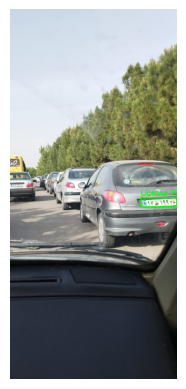

'/content/cropped_plates/cropped_plate.jpg'

In [17]:
import matplotlib.pyplot as plt

model = YOLO("/content/runs/detect/train/weights/best.pt")


output_folder = "/content/cropped_plates"
os.makedirs(output_folder, exist_ok=True)


def detect_and_crop(image_path):
    img = cv2.imread(image_path)
    results = model(img)

    detections = results[0].boxes

    if len(detections) == 0:
        print("No license plate detected.")
        return None

    for detection in detections:
        x1, y1, x2, y2 = detection.xyxy[0].cpu().numpy()


        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 3)
        cv2.putText(img, "License Plate", (int(x1), int(y1)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)


        cropped_plate = img[int(y1):int(y2), int(x1):int(x2)]


        filename = os.path.join(output_folder, "cropped_plate.jpg")
        cv2.imwrite(filename, cropped_plate)

        print(f"Saved cropped license plate: {filename}")


    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

    return filename


image_path = "/content/photo_5798886894430438785_y.jpg"
detect_and_crop(image_path)


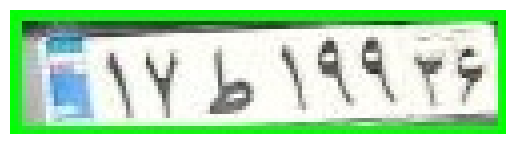

In [18]:

cropped_img = cv2.imread("/content/cropped_plates/cropped_plate.jpg")
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()



0: 640x288 1 License-Plate, 11.0ms
Speed: 3.1ms preprocess, 11.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 288)
Saved cropped license plate: /content/cropped_plates/cropped_plate.jpg


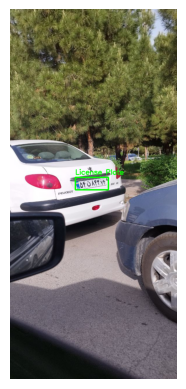

'/content/cropped_plates/cropped_plate.jpg'

In [13]:
image_path = "/content/photo_5798886894430438787_y.jpg"
detect_and_crop(image_path)

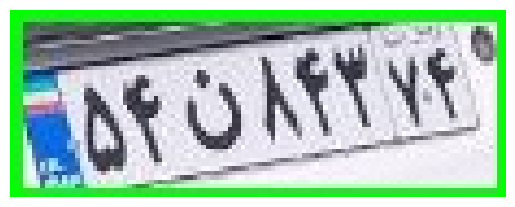

In [16]:
cropped_img = cv2.imread("/content/cropped_plates/cropped_plate.jpg")
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
